# Debugging notebook for alphaDIA
This notebooks allows you to run a search in a jupyter notebook and debug the results.
It allows you to debug a search on the workflow level as well on the peakgroup level

In [1]:
%reload_ext autoreload
%autoreload 2





import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.environ["RUST_BACKTRACE"] = "1"

from alphabase.spectral_library.base import SpecLibBase

from alphadia import search_step, search_plan
from alphadia.workflow import peptidecentric

os.environ["NUMBA_BOUNDSCHECK"] = "1"
os.environ["NUMBA_DEVELOPER_MODE"] = "1"
os.environ["NUMBA_FULL_TRACEBACKS"] = "1"

/Users/georgwallmann/miniconda3/envs/alpha-rs/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/georgwallmann/miniconda3/envs/alpha-rs/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import tempfile

library_path = '/Users/georgwallmann/Documents/data/alphadia_performance_tests/libraries/astral/hela_hybrid.hdf'
raw_data_path_list = [
    '/Users/georgwallmann/Documents/data/alphadia_performance_tests/raw_data/astral_lf_dia_200ng/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw',
    '/Users/georgwallmann/Documents/data/alphadia_performance_tests/raw_data/astral_lf_dia_200ng/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06.raw',
    '/Users/georgwallmann/Documents/data/alphadia_performance_tests/raw_data/astral_lf_dia_200ng/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05.raw'
]

In [3]:
config = {
    "general": {
        "reuse_calibration": True,
        "reuse_quant": False,
        "thread_count": 10,
    },
    "search": {
        "target_ms1_tolerance": 4,
        "target_ms2_tolerance": 7,
    },
    "raw_paths": raw_data_path_list,
    "library_path": library_path,
    
}
output_folder = "/Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia"
step = search_step.SearchStep(output_folder, config=config)

0:00:00.000835 INFO: Moved old log file /Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia/log.txt to /Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia/log.37.bkp.txt
0:00:00.001352 INFO: loading config from /Users/georgwallmann/Documents/git/alphadia/alphadia/constants/default.yaml
0:00:00.009882 INFO: loading additional config provided via CLI
0:00:00.010492 INFO: Updating config with 'user defined'
0:00:00.010907 INFO: ├──version: 1
0:00:00.011119 INFO: ├──workflow_name: None
0:00:00.011469 INFO: ├──output_directory: None
0:00:00.011699 INFO: ├──library_path: /Users/georgwallmann/Documents/data/alphadia_performance_tests/libraries/astral/hela_hybrid.hdf [user defined, default: None]
0:00:00.011937 INFO: ├──raw_paths:
0:00:00.012188 INFO: │   - /Users/georgwallmann/Documents/data/alphadia_performance_tests/raw_data/astral_lf_dia_200ng/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07.raw [user defined, default:

In [4]:
for raw_name, dia_path, speclib in step.get_run_data():
    pass

0:00:21.218179 PROGRESS: Loading raw file 1/3: 20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_07
0:00:21.219151 PROGRESS: Loading raw file 2/3: 20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_06
0:00:21.220008 PROGRESS: Loading raw file 3/3: 20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05


In [5]:
workflow = peptidecentric.PeptideCentricWorkflow(
    raw_name,
    step.config,
)
workflow.load(dia_path, speclib)
workflow.search_parameter_optimization()

0:00:21.250314 INFO: Quantification results path: /Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia/quant
0:00:21.251721 INFO: Initializing RawFileManager
49it [00:12,  3.82it/s]
0:00:36.132837 INFO: Determining DIA cycle
0:00:36.297579 INFO: Found cycle with start 0.00 min and length 301.
0:00:36.466822 INFO: RT (min)            : 0.0 - 20.9
0:00:36.467315 INFO: RT duration (sec)   : 1253.3
0:00:36.467634 INFO: RT duration (min)   : 20.9
0:00:36.467921 INFO: Cycle len (scans)   : 301
0:00:36.468225 INFO: Cycle len (sec)     : 1.55
0:00:36.468417 INFO: Number of cycles    : 806
0:00:36.468652 INFO: MS2 range (m/z)     : 380.4 - 980.7
0:00:36.514318 INFO: Loaded CalibrationManager from /Users/georgwallmann/Documents/data/alphadia_performance_tests/output/astral_lf_dia/quant/20231017_OA2_TiHe_ADIAMA_HeLa_200ng_Evo011_21min_F-40_05/calibration_manager.pkl
0:00:36.514979 INFO: Initializing CalibrationManager
0:00:36.515555 INFO: Disabling ion mobility cali

In [6]:
workflow.calibration_manager.predict(
    workflow.spectral_library._precursor_df, "precursor"
)
workflow.calibration_manager.predict(
    workflow.spectral_library._fragment_df, "fragment"
)

0:00:36.672729 INFO: calibration group: precursor, predicting mz
0:00:36.714993 INFO: calibration group: precursor, predicting rt
0:00:36.834523 INFO: calibration group: fragment, predicting mz


In [7]:
rt_tolerance = workflow.optimization_manager.rt_error
print('rt_tolerance', rt_tolerance)
fragment_mz_tolerance = workflow.optimization_manager.ms2_error
print('fragment_mz_tolerance', fragment_mz_tolerance)
precursor_mz_tolerance = workflow.optimization_manager.ms1_error
print('precursor_mz_tolerance', precursor_mz_tolerance)

rt_tolerance 102.64878707641762
fragment_mz_tolerance 7.0
precursor_mz_tolerance 4.0


In [8]:
cycle_len = workflow.dia_data.cycle.shape[1]
delta_scan_idx = np.tile(np.arange(cycle_len), int(len(workflow.dia_data.spectrum_df) / cycle_len + 1 ))
cycle_idx = np.repeat(np.arange(int(len(workflow.dia_data.spectrum_df) / cycle_len + 1 )), cycle_len)

workflow.dia_data.spectrum_df['delta_scan_idx'] = delta_scan_idx[:len(workflow.dia_data.spectrum_df)]
workflow.dia_data.spectrum_df['cycle_idx'] = cycle_idx[:len(workflow.dia_data.spectrum_df)]

In [9]:

import alpha_rs

rs_data = alpha_rs.DIAData.from_arrays(
    workflow.dia_data.spectrum_df['delta_scan_idx'].values,
    workflow.dia_data.spectrum_df['isolation_lower_mz'].values.astype(np.float32),
    workflow.dia_data.spectrum_df['isolation_upper_mz'].values.astype(np.float32),
    workflow.dia_data.spectrum_df['peak_start_idx'].values,
    workflow.dia_data.spectrum_df['peak_stop_idx'].values,
    workflow.dia_data.spectrum_df['cycle_idx'].values,
    workflow.dia_data.spectrum_df['rt'].values.astype(np.float32)*60,
    workflow.dia_data.peak_df['mz'].values.astype(np.float32),
    workflow.dia_data.peak_df['intensity'].values.astype(np.float32)
)

In [10]:
lib = alpha_rs.SpecLibFlat.from_arrays(
    workflow.spectral_library.precursor_df['precursor_idx'].values.astype(np.uint64),
    workflow.spectral_library.precursor_df['mz_library'].values.astype(np.float32),
    workflow.spectral_library.precursor_df['rt_calibrated'].values.astype(np.float32),
    workflow.spectral_library.precursor_df['flat_frag_start_idx'].values.astype(np.int64),
    workflow.spectral_library.precursor_df['flat_frag_stop_idx'].values.astype(np.int64),
    workflow.spectral_library.fragment_df['mz_calibrated'].values.astype(np.float32),
    workflow.spectral_library.fragment_df['intensity'].values.astype(np.float32)
)

In [11]:
fwhm_rt = 3
kernel_size = 16

peak_group_scoring = alpha_rs.PeakGroupScoring(fwhm_rt, kernel_size, True)

In [ ]:
mass_tolerance = 7
rt_tolerance = 100

result = peak_group_scoring.search(rs_data, lib, mass_tolerance, rt_tolerance).to_arrays()

In [16]:
precursor_idx = result[0]
rank = result[1]
score = result[2]
scan_center = result[3]
scan_start = result[4]
scan_stop = result[5]
frame_center = result[6]
frame_start = result[7]
frame_stop = result[8]

candidates_df = pd.DataFrame({
    'precursor_idx': precursor_idx,
    'rank': rank,
    'score': score,
    'scan_center': scan_center,
    'scan_start': scan_start,
    'scan_stop': scan_stop,
    'frame_center': frame_center,
    'frame_start': frame_start,
    'frame_stop': frame_stop
})

candidates_df = candidates_df.merge(
    workflow.spectral_library.precursor_df[['precursor_idx', 'elution_group_idx', 'decoy']], on='precursor_idx', how='left'
)

candidates_df['frame_start'] = np.maximum(candidates_df['frame_start'] * workflow.dia_data.cycle.shape[1], 0)
candidates_df['frame_stop'] = (candidates_df['frame_stop'] + 1) * workflow.dia_data.cycle.shape[1]
candidates_df['frame_center'] = candidates_df['frame_center'] * workflow.dia_data.cycle.shape[1]

candidates_df['scan_start'] = 0
candidates_df['scan_stop'] = 1
candidates_df['scan_center'] = 0

In [20]:
candidates_df = candidates_df.sort_values(by='score', ascending=False).head(10)

In [21]:
candidates_df

,precursor_idx,rank,score,scan_center,scan_start,scan_stop,frame_center,frame_start,frame_stop,elution_group_idx,decoy
102,34,1,1.508442e+06,0,0,1,159530,158025,161336,17,0
156,53,1,3.605868e+05,0,0,1,101437,99932,103243,26,0
204,70,1,2.854975e+05,0,0,1,76454,74949,78260,35,0
30,10,1,2.301836e+05,0,0,1,72842,71337,74648,5,0
120,40,1,1.966297e+05,0,0,1,106855,105350,108661,20,0
234,80,1,1.646646e+05,0,0,1,91203,89698,93009,40,0
57,19,1,1.449512e+05,0,0,1,83979,82474,85785,9,0
235,80,2,1.322499e+05,0,0,1,94514,93009,96320,40,0
48,16,1,9.527269e+04,0,0,1,130032,128527,131838,8,1
129,43,1,7.474277e+04,0,0,1,50267,48762,52073,21,0


0:01:49.861384 INFO: Starting candidate scoring
0:01:51.431983 INFO: Debug mode enabled. Processing only the first 10 score groups
  0%|          | 0/10 [00:00<?, ?it/s]

precursor 10 channel 0


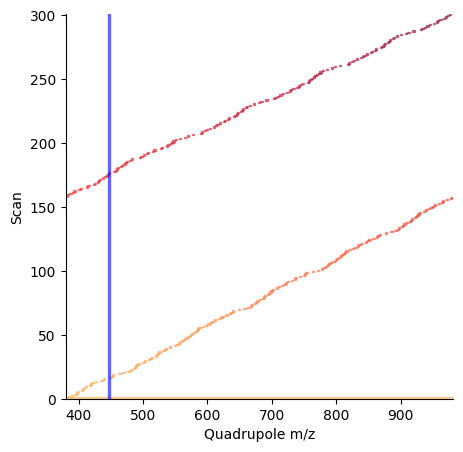

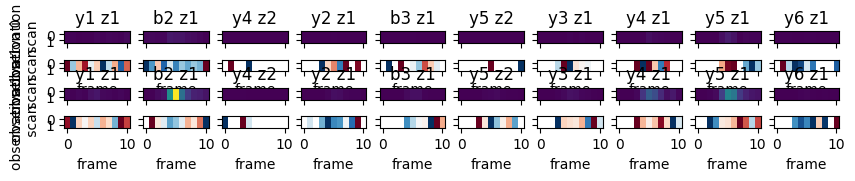

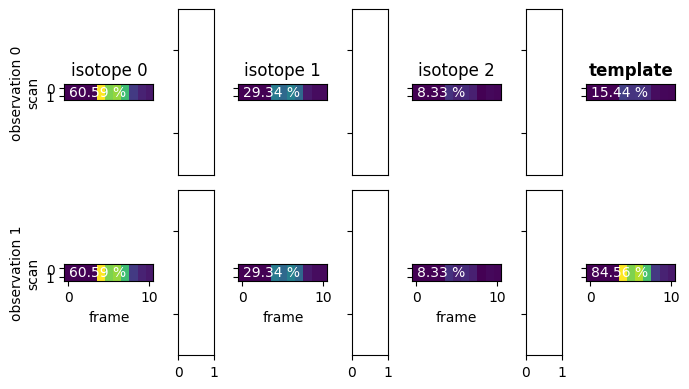

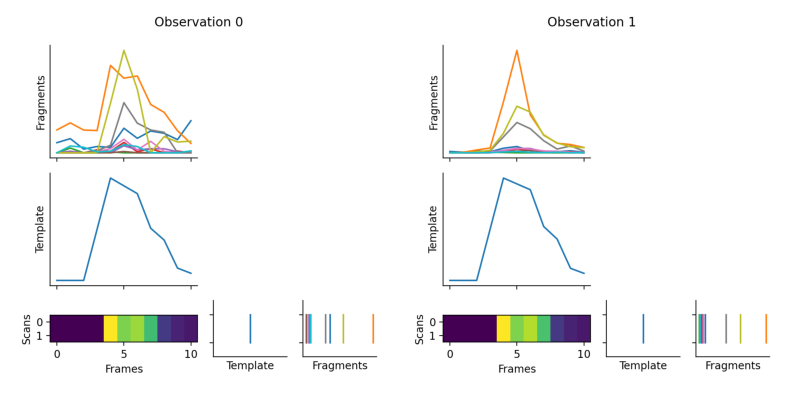

 10%|█         | 1/10 [00:31<04:46, 31.88s/it]

precursor 16 channel 0


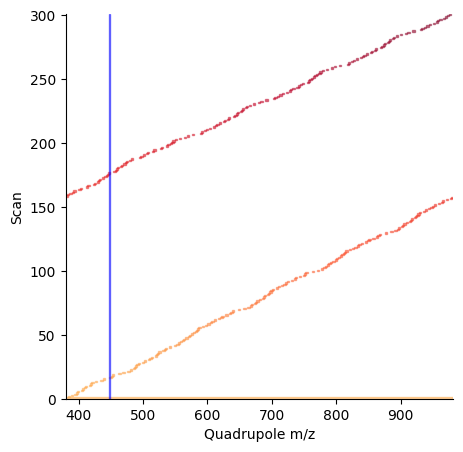

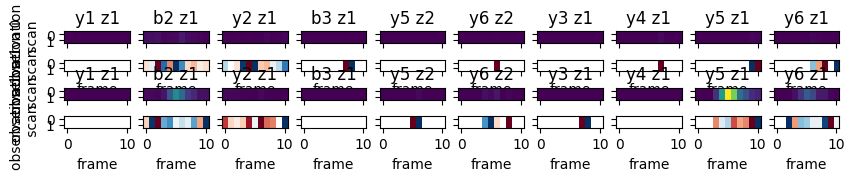

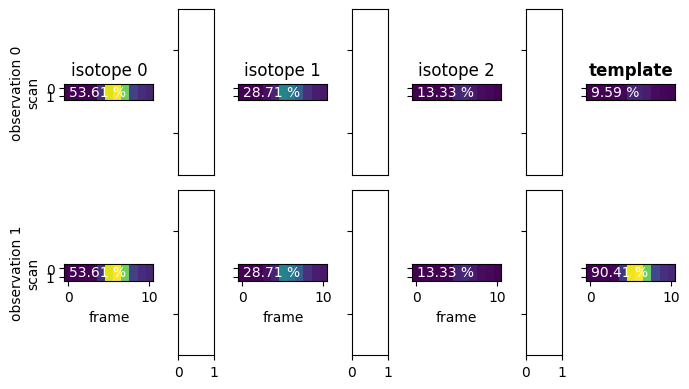

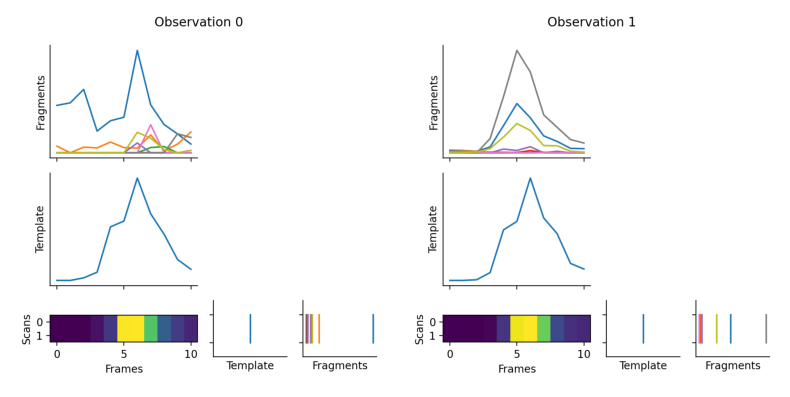

 20%|██        | 2/10 [00:33<01:54, 14.30s/it]

precursor 19 channel 0


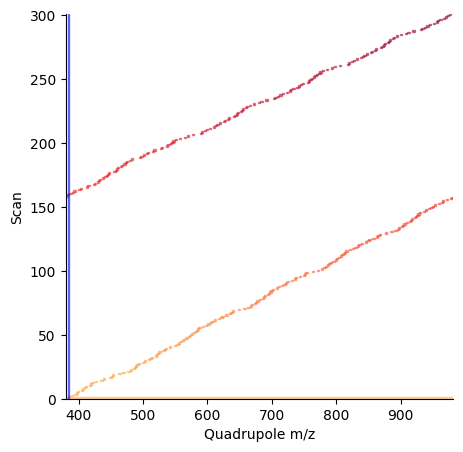

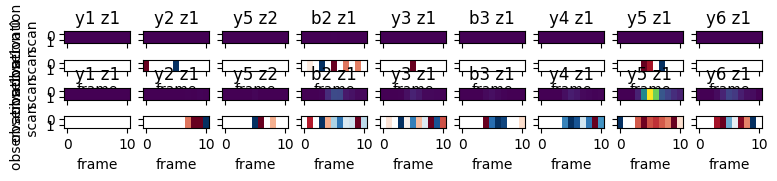

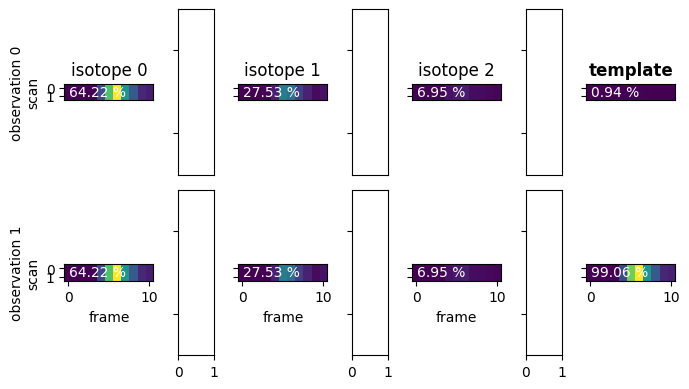

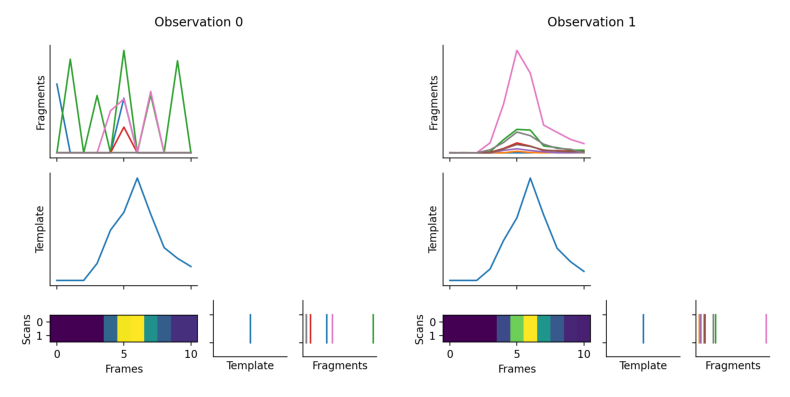

 30%|███       | 3/10 [00:35<00:59,  8.48s/it]

precursor 34 channel 0


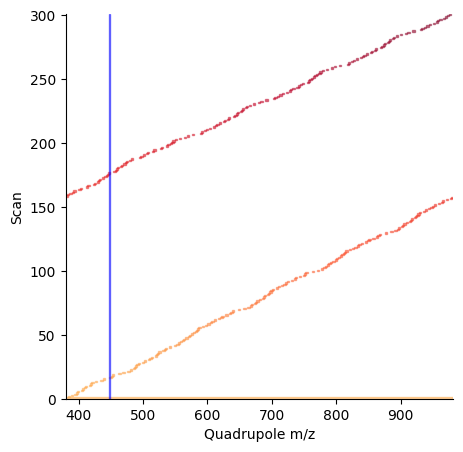

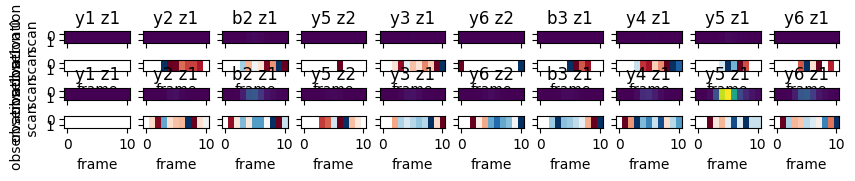

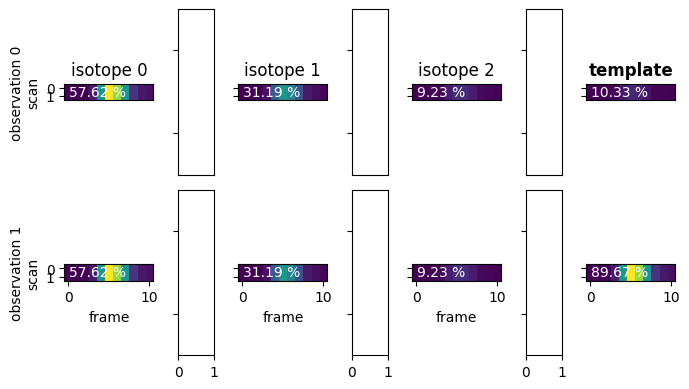

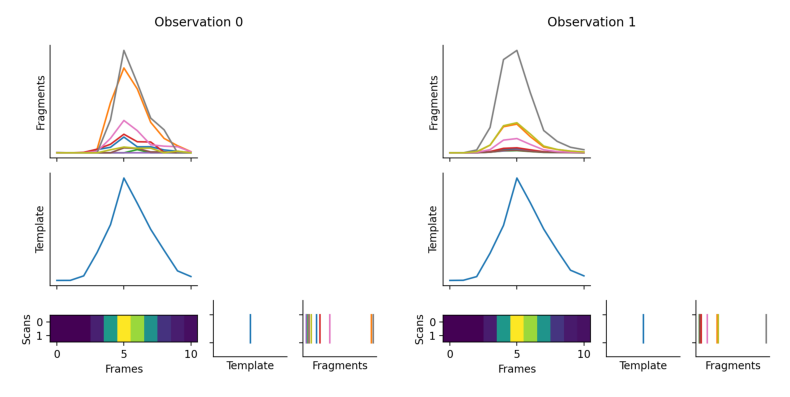

 40%|████      | 4/10 [00:37<00:35,  5.92s/it]

precursor 40 channel 0


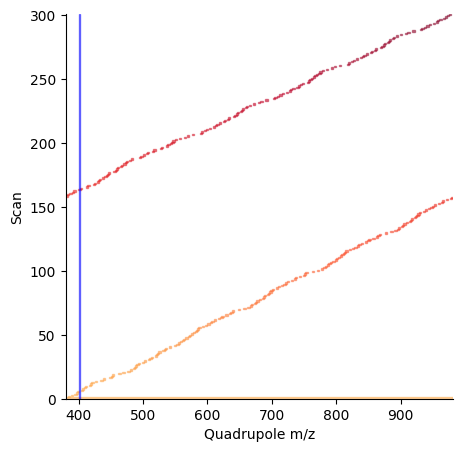

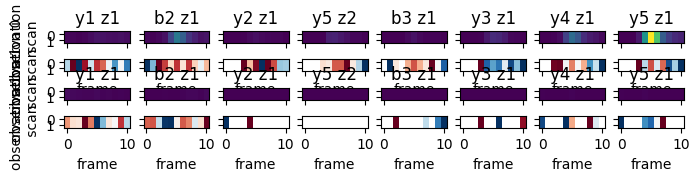

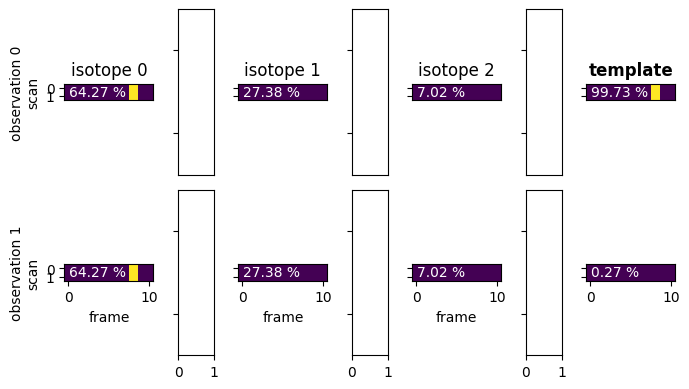

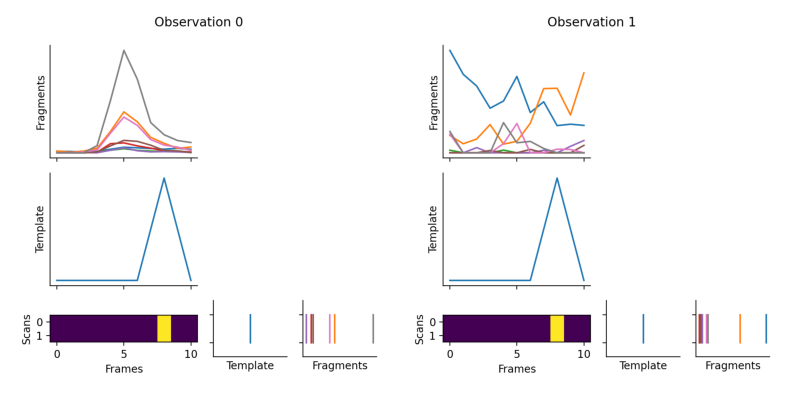

 50%|█████     | 5/10 [00:39<00:21,  4.39s/it]

precursor 43 channel 0


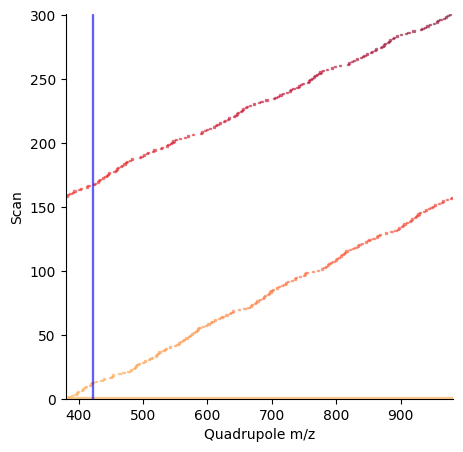

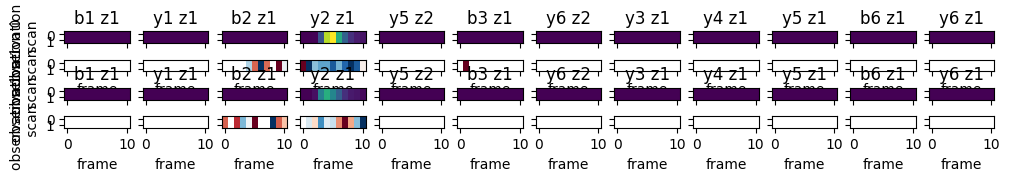

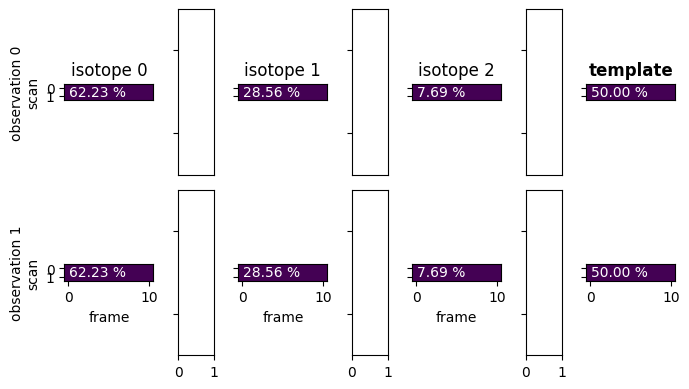

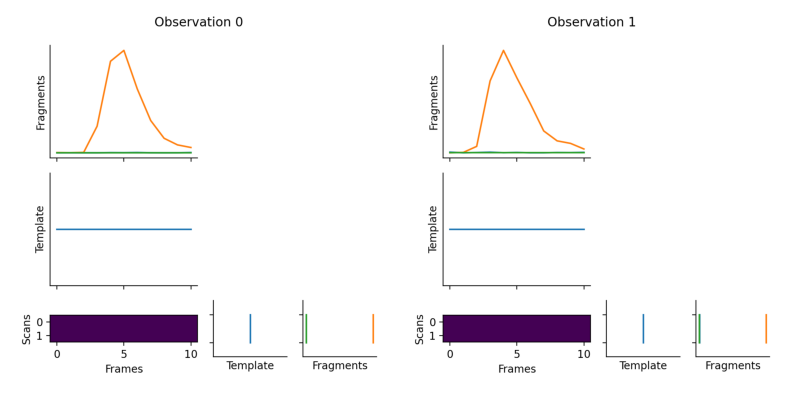

 60%|██████    | 6/10 [00:41<00:14,  3.61s/it]

precursor 53 channel 0


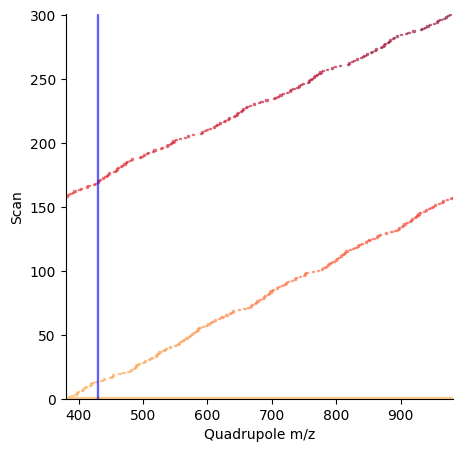

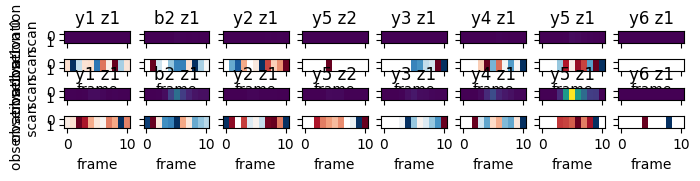

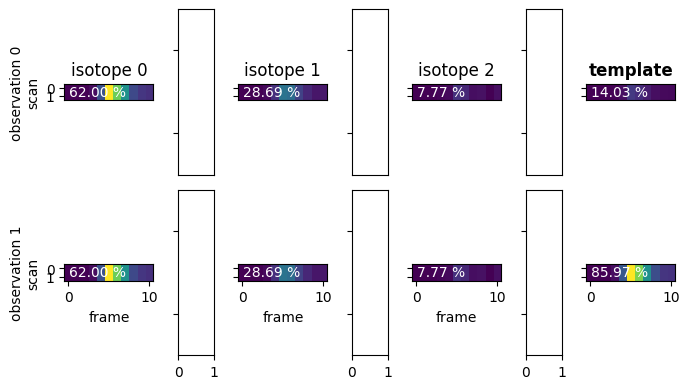

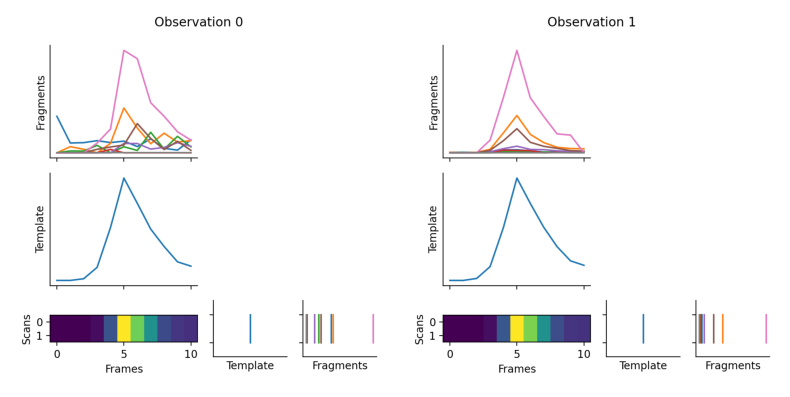

 70%|███████   | 7/10 [00:42<00:08,  2.98s/it]

precursor 70 channel 0


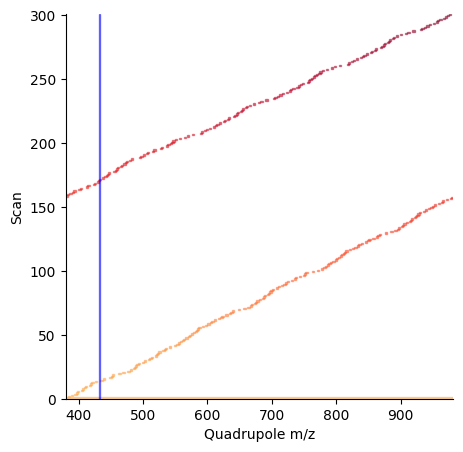

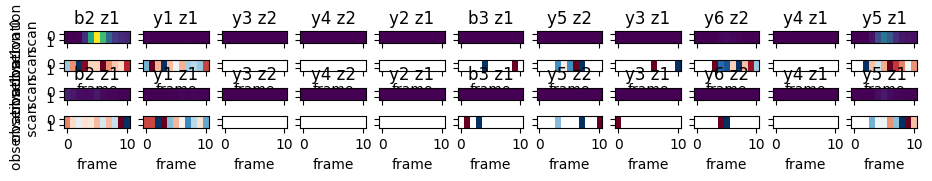

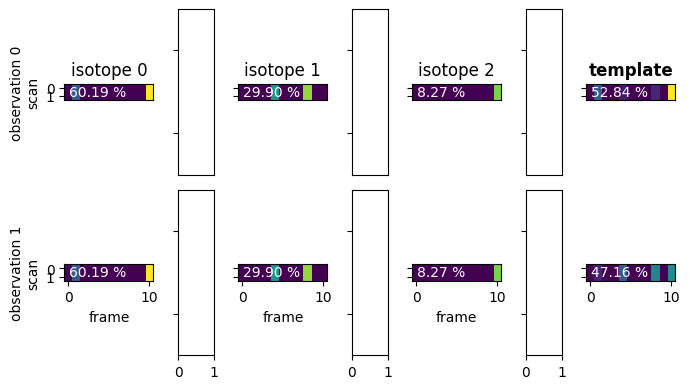

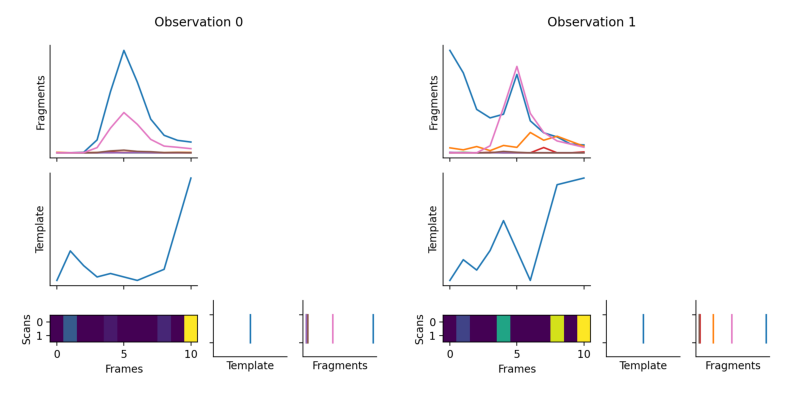

 80%|████████  | 8/10 [00:45<00:05,  2.72s/it]

precursor 80 channel 0


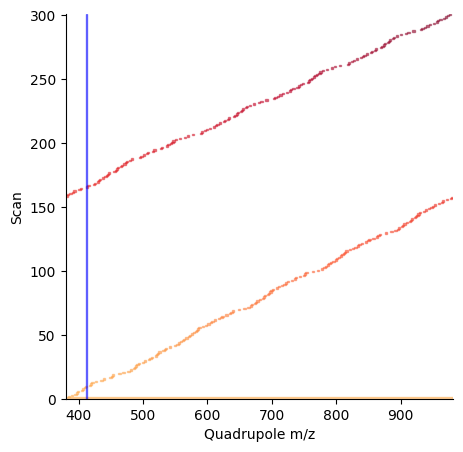

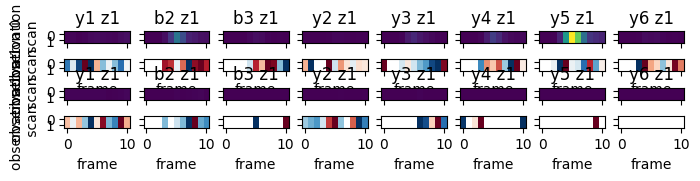

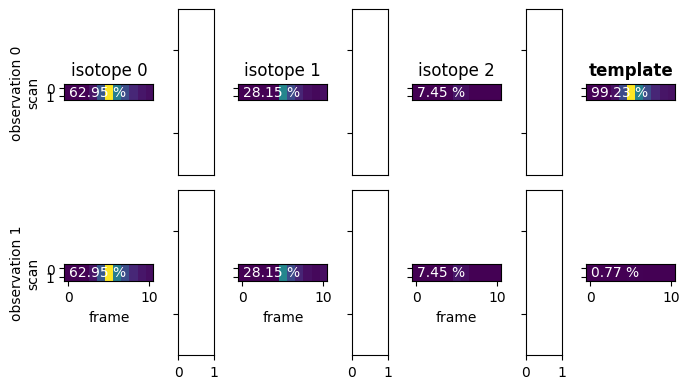

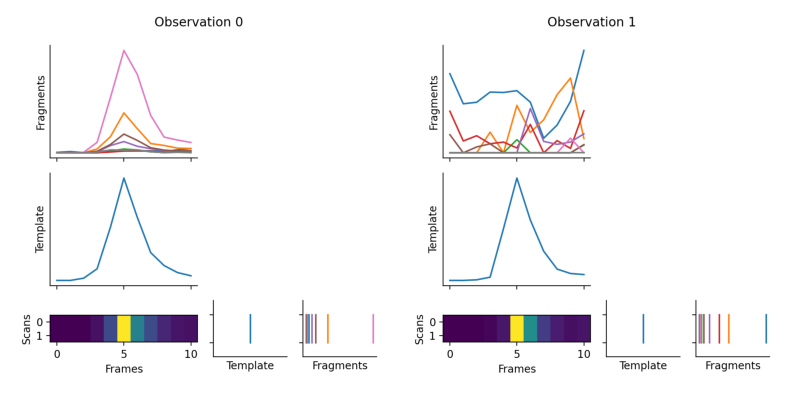

 90%|█████████ | 9/10 [00:46<00:02,  2.31s/it]

precursor 80 channel 0


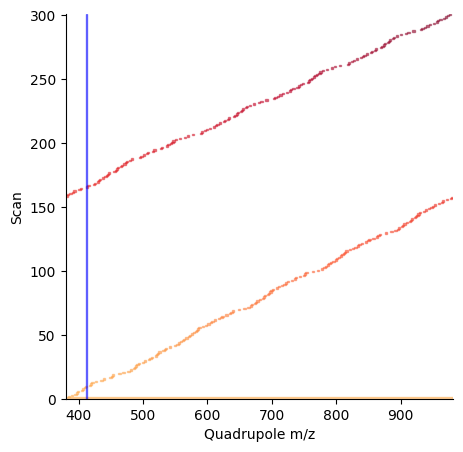

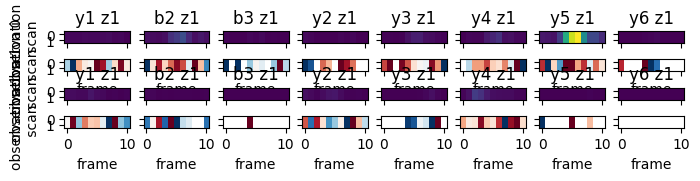

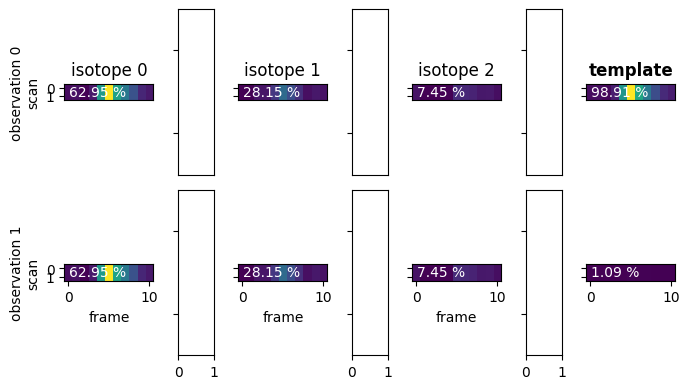

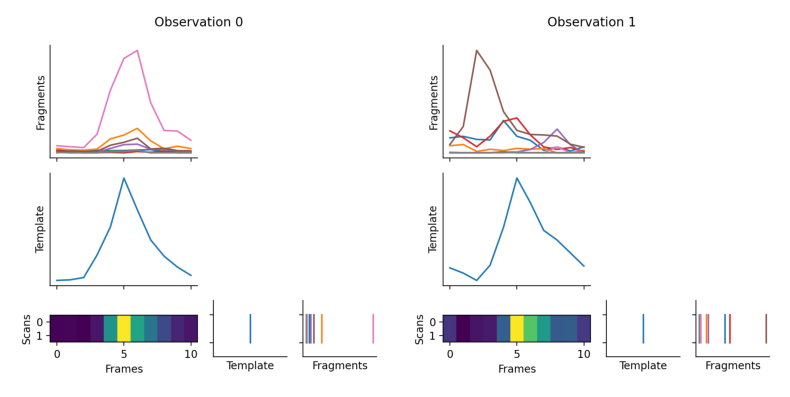

100%|██████████| 10/10 [00:48<00:00,  4.81s/it]
0:02:39.744264 INFO: Finished candidate processing
0:02:39.744530 INFO: Collecting candidate features
0:02:39.897657 INFO: Collecting fragment features
0:02:40.323971 INFO: Finished candidate scoring


In [22]:
from alphadia import plexscoring

config = plexscoring.CandidateConfig()
config.update(workflow.config["scoring_config"])
config.update(
    {
        "precursor_mz_tolerance": workflow.optimization_manager.ms1_error,
        "fragment_mz_tolerance": workflow.optimization_manager.ms2_error,
        "exclude_shared_ions": workflow.config["search"]["exclude_shared_ions"],
    }
)

candidate_scoring = plexscoring.CandidateScoring(
    workflow.dia_data.jitclass(),
    workflow.spectral_library._precursor_df,
    workflow.spectral_library._fragment_df,
    config=config,
    rt_column=f"rt_{workflow.optimization_manager.column_type}",
    mobility_column=f"mobility_library",
    precursor_mz_column=f"mz_{workflow.optimization_manager.column_type}",
    fragment_mz_column=f"mz_{workflow.optimization_manager.column_type}",
)

features_df, fragments_df = candidate_scoring(
    candidates_df,
    thread_count=workflow.config["general"]["thread_count"],
    debug=True,
)

In [32]:
features_df

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,...,mods,mobility_library,flat_frag_start_idx,mod_sites,channel,rt_calibrated,delta_rt,n_K,n_R,n_P
0,0.0,17.170410,735.793884,0.000001,0.000000e+00,0.000000e+00,2.408519e+06,5.893261e+05,-0.378373,0.378373,...,Oxidation@M,0.0,0,1,0,618.062866,117.731018,1,0,0
1,0.0,17.093689,575.957642,0.000001,2.661462e+05,2.661462e+05,2.661462e+05,1.472774e+05,-0.533555,0.533555,...,Oxidation@M,0.0,0,1,0,618.062866,-42.105225,1,0,0
2,0.0,17.156708,436.345856,0.000001,0.000000e+00,0.000000e+00,3.203328e+06,3.688386e+05,0.103871,0.103871,...,Oxidation@M,0.0,0,1,0,618.062866,-181.717010,1,0,0
3,0.0,17.083679,710.838806,0.000001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,Oxidation@M,0.0,3022983,1,0,618.062866,92.775940,1,0,0
4,0.0,17.100342,509.296356,0.000001,0.000000e+00,0.000000e+00,4.077891e+06,4.695378e+05,0.178163,0.178163,...,Oxidation@M,0.0,3022983,1,0,618.062866,-108.766510,1,0,0
5,0.0,17.043640,647.208740,0.000001,2.989509e+05,2.989509e+05,8.232264e+05,2.257968e+05,-0.350532,0.350532,...,Oxidation@M,0.0,3022983,1,0,618.062866,29.145874,1,0,0
6,0.0,17.016083,392.848938,0.000001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,,0.0,11,,0,223.175598,169.673340,1,0,0
7,0.0,17.086624,165.949112,0.000001,1.495432e+05,1.495432e+05,4.301581e+05,1.160632e+05,0.098987,0.098987,...,,0.0,11,,0,223.175598,-57.226486,1,0,0
8,0.0,17.141998,321.383148,0.000001,2.991331e+06,2.991331e+06,3.590441e+06,1.820523e+06,1.881184,1.881184,...,,0.0,11,,0,223.175598,98.207550,1,0,0
9,0.0,17.077820,287.143005,0.000001,1.448758e+06,1.448758e+06,2.162637e+07,3.119856e+06,-0.905214,0.905214,...,,0.0,3022994,,0,223.175598,63.967407,1,0,0


## Multistep Search

In [ ]:
from alphadia.search_plan import SearchPlan

config = {
    "raw_paths": raw_data_path_list,
    "library_path": library_path,
}

plan = SearchPlan(output_folder, config=config)
plan.run_plan()